In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1500

incident_id = np.arange(1, n+1)

severity = np.random.choice(
    ["Critical", "High", "Medium", "Low"],
    size=n,
    p=[0.10, 0.20, 0.40, 0.30]
)

service_name = np.random.choice(
    ["Payments", "Fraud Engine", "Auth API", "Data Pipeline", "Risk Scoring", "Customer Portal"],
    size=n
)

root_cause = np.random.choice(
    ["Database Slowdown", "API Timeout", "Dependency Failure", "Config Error", "Memory Leak", "Network Latency", "Unknown"],
    size=n
)

# time to detect (minutes)
time_to_detect = np.round(np.random.exponential(scale=12, size=n) + np.random.uniform(1, 4, n), 2)

# time to resolve (minutes)
time_to_resolve = np.round(np.random.exponential(scale=40, size=n) + np.random.uniform(5, 20, n), 2)

# SLA threshold (in minutes)
SLA_limit = 60

# SLA breached?
SLA_breached = np.where(time_to_resolve > SLA_limit, "Yes", "No")

df = pd.DataFrame({
    "incident_id": incident_id,
    "severity": severity,
    "service_name": service_name,
    "root_cause": root_cause,
    "time_to_detect": time_to_detect,
    "time_to_resolve": time_to_resolve,
    "SLA_breached": SLA_breached
})

df.head()


,incident_id,severity,service_name,root_cause,time_to_detect,time_to_resolve,SLA_breached
0,1,Medium,Fraud Engine,Config Error,5.25,39.99,No
1,2,Low,Customer Portal,Network Latency,12.72,75.07,Yes
2,3,Low,Data Pipeline,Database Slowdown,10.66,104.29,Yes
3,4,Medium,Risk Scoring,Dependency Failure,19.49,54.89,No
4,5,High,Risk Scoring,Dependency Failure,24.76,13.00,No


In [4]:
df.info()
df.describe()
df["severity"].value_counts()
df["SLA_breached"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   incident_id      1500 non-null   int64  
 1   severity         1500 non-null   object 
 2   service_name     1500 non-null   object 
 3   root_cause       1500 non-null   object 
 4   time_to_detect   1500 non-null   float64
 5   time_to_resolve  1500 non-null   float64
 6   SLA_breached     1500 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 82.2+ KB


SLA_breached
No     1018
Yes     482
Name: count, dtype: int64

# Severity Distribution

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_55538/922733203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="severity", order=["Critical", "High", "Medium", "Low"], palette="Blues")


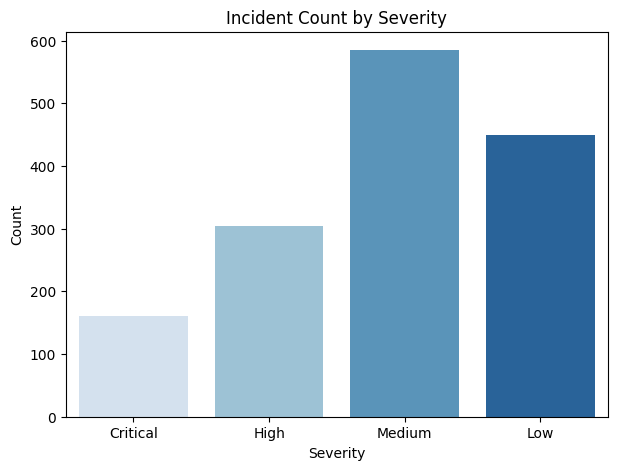

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="severity", order=["Critical", "High", "Medium", "Low"], palette="Blues")
plt.title("Incident Count by Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

#  Root Cause Breakdown

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_55538/4102863142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="root_cause", palette="Blues")


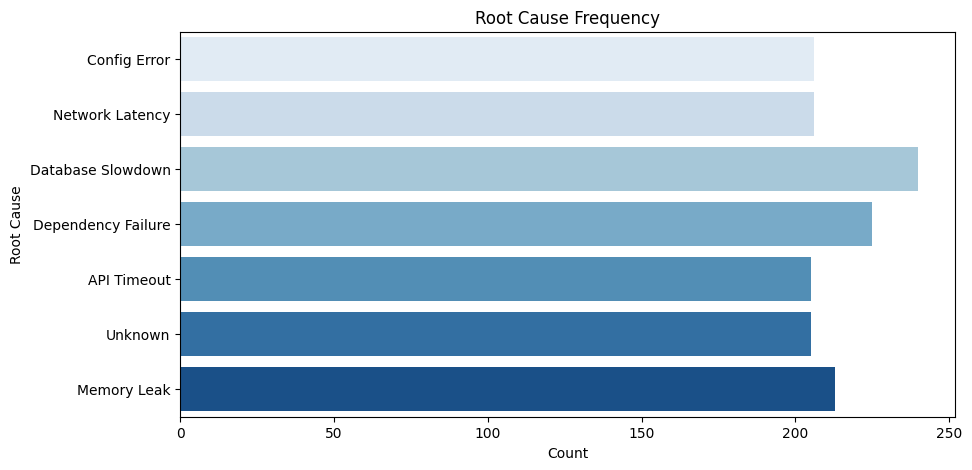

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="root_cause", palette="Blues")
plt.title("Root Cause Frequency")
plt.xlabel("Count")
plt.ylabel("Root Cause")
plt.show()


# SLA Breach Rate

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_55538/2619523577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SLA_breached", palette="Blues")


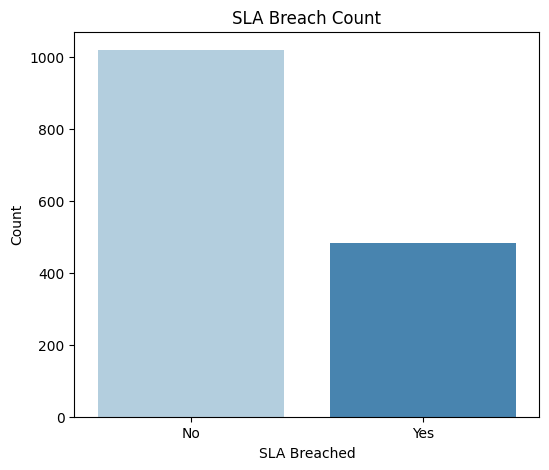

In [7]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="SLA_breached", palette="Blues")
plt.title("SLA Breach Count")
plt.xlabel("SLA Breached")
plt.ylabel("Count")
plt.show()

# Time to Detect Distribution

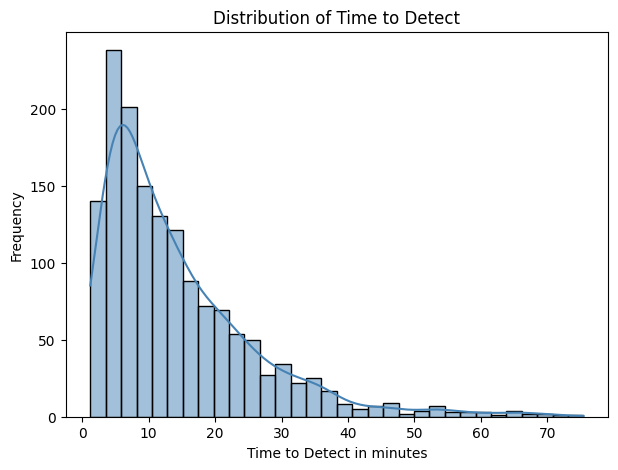

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(df["time_to_detect"], kde=True, color="steelblue")
plt.title("Distribution of Time to Detect")
plt.xlabel("Time to Detect in minutes")
plt.ylabel("Frequency")
plt.show()

# Time to Resolve Distribution

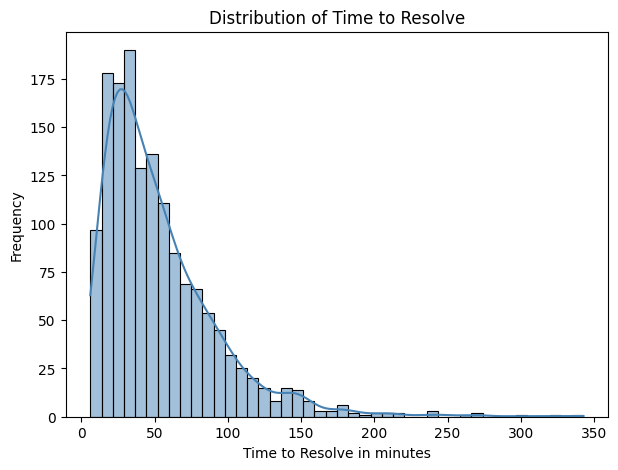

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df["time_to_resolve"], kde=True, color="steelblue")
plt.title("Distribution of Time to Resolve")
plt.xlabel("Time to Resolve in minutes")
plt.ylabel("Frequency")
plt.show()

# Service Reliability Ranking

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_55538/3604853812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_counts.index, y=service_counts.values, palette="Blues")


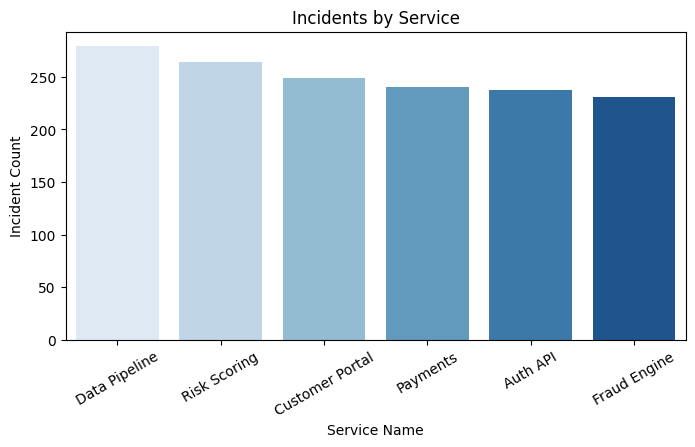

In [10]:
service_counts = df["service_name"].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=service_counts.index, y=service_counts.values, palette="Blues")
plt.title("Incidents by Service")
plt.xlabel("Service Name")
plt.ylabel("Incident Count")
plt.xticks(rotation=30)
plt.show()

# Heatmap: Severity vs SLA Breach

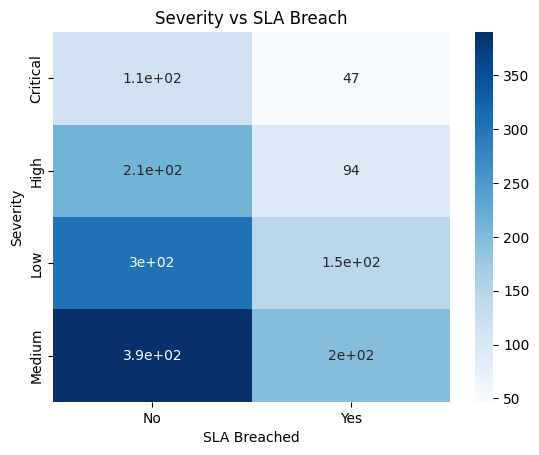

In [11]:
pivot = pd.crosstab(df["severity"], df["SLA_breached"])

sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Severity vs SLA Breach")
plt.xlabel("SLA Breached")
plt.ylabel("Severity")
plt.show()


# Compute Key TPM Metrics

In [13]:
MTTD = df["time_to_detect"].mean()
MTTR = df["time_to_resolve"].mean()
breach_rate = (df["SLA_breached"] == "Yes").mean() * 100
MTTD, MTTR, breach_rate

(14.262773333333334, 53.28451333333333, 32.13333333333333)

# Calculate Service wise SLA breach rate

In [14]:
service_breach = df.groupby("service_name")["SLA_breached"].apply(lambda x: (x == "Yes").mean() * 100).sort_values(ascending=False)
service_breach


service_name
Auth API           35.021097
Payments           32.916667
Fraud Engine       32.900433
Risk Scoring       31.818182
Data Pipeline      30.824373
Customer Portal    29.718876
Name: SLA_breached, dtype: float64